In [ ]:
# Repository github url : https://github.com/jai-mr/
# Assignment Repository : https://github.com/jai-mr/Assignment-14
# Submitted by : Jaideep Rangnekar
# Registered email id : jaideepmr@gmail.com

In [ ]:
#-----------------------------PlanerCNN----------------------------#

In [1]:
import os, torch
print('Torch', torch.__version__, 'CUDA', torch.version.cuda)
print('Device:', torch.device('cuda:0'))
print(torch.cuda.is_available())  

Torch 1.6.0+cu101 CUDA 10.1
Device: cuda:0
True


In [2]:
# Install Cuda 8.0
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2020-10-31 14:13:00--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?2YcwtVW_8F56XKjz6hidm-A4Zo2_p_wqp38EpNREpV7YYYSCH3WxxZH9w_mEtNY9fPCytsaK4Ol96ABqlKy_JJ-hepJDpiajdQfEIz6Ml-gleZVUZizC-pWqNLFKz3WfcwEGlzjt1iOLzqnYDHZ-IGd6AsjhPZjZfsinJtpxtRuOVPkreUOUdyTWs4G1GpIqXSnNGhy2u78TWn__dSiabyGxeA [following]
--2020-10-31 14:13:00--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?2YcwtVW_8F56XKjz6hidm-A4Zo2_p_wqp38EpNREpV7YYYSCH3WxxZH9w_mEtNY9fPCytsaK4Ol96ABqlKy_JJ-hepJDpiajdQ

In [3]:
!ls

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  sample_data


In [4]:
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

Selecting previously unselected package cuda-repo-ubuntu1604-8-0-local-ga2.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
Setting up cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
Note: Check first if apt-key functionality is needed at all - it probably isn't!
OK


In [5]:
!ls /var/

backups  colab			  lib	 lock  mail  run    tmp
cache	 cuda-repo-8-0-local-ga2  local  log   opt   spool


In [6]:
!ls /var/cuda-repo-8-0-local-ga2 | grep .pub

7fa2af80.pub


In [7]:
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub

OK


In [8]:
!apt-get update

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 file:/var/cuda-repo-8-0-local-ga2  Packages [22.7 kB]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x8

In [9]:
!apt-get install cuda-8-0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cusolver-dev-8-0 cuda-cusparse-8-0 cuda-cusparse-dev-8-0
  cuda-demo-suite-8-0 cuda-documentation-8-0 cuda-driver-dev-8-0
  cuda-license-8-0 cuda-misc-headers-8-0 cuda-npp-8-0 cuda-npp-dev-8-0
  cuda-nvgraph-8-0 cuda-nvgraph-dev-8-0 cuda-nvml-dev-8-0 cuda-nvrtc-8-0
  cuda-nvrtc-dev-8-0 cuda-runtime-8-0 cuda-samples-8-0 cuda-toolkit-8-0
  cuda-visual-tools-8-0
The following NEW packages will be installed:
  cuda-8-0 cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cuso

In [ ]:
# Install [PyTorch](https://pytorch.org/) with Cuda 8.0 support

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [10]:
!pip install torch==0.4.0

     |████████████████████████████████| 484.0MB 30kB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 0.4.0 which is incompatible.
ERROR: fastai 1.0.61 has requirement torch>=1.0.0, but you'll have torch 0.4.0 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101


In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [2]:
import torch
from torch import nn
print(torch.__version__)

0.4.0


In [3]:
# Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
from google.colab import drive
drive.mount("/content/gdrive")
# gdrivepath="/content/gdrive/My Drive/Colab Notebooks/S14/"
gdrivepath="/content/gdrive/My Drive/ColabFiles/S14/"
import os 
os.chdir(gdrivepath)
!pwd
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/ColabFiles/S14
MiDaS	planercnn	     S14_CodeFinal_Midas.ipynb
Output	S14_CodeFinal.ipynb  S14_CodeFinal_PlanerCnn.ipynb


In [ ]:
# Setup PlanerCNN

In [ ]:
!git clone https://github.com/NVlabs/planercnn.git

Cloning into 'planercnn'...
remote: Enumerating objects: 150, done.
remote: Total 150 (delta 0), reused 0 (delta 0), pack-reused 150
Receiving objects: 100% (150/150), 1.33 MiB | 24.68 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [4]:
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14
MiDaS	planercnn	     S14_CodeFinal_Midas.ipynb
Output	S14_CodeFinal.ipynb  S14_CodeFinal_PlanerCnn.ipynb


In [5]:
!ls planercnn  

 anchors	        evaluate_utils.py   Readme.txt
 cffirequirements.txt   example_images	    requirements.txt
 checkpoint	        LICENSE.md	    roialign
 config.py	        models		    test
 customimages	        nms		    train_planercnn.py
 data_prep	        options.py	    utils.py
 datasets	        plane_utils.py	    visualize_utils.py
'evaluate - Copy.py'    __pycache__
 evaluate.py	        README.md


In [6]:
import os 
os.chdir("planercnn")

In [ ]:
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn
 anchors	        evaluate_utils.py   README.md
 cffirequirements.txt   example_images	    Readme.txt
 config.py	        LICENSE.md	    requirements.txt
 data_prep	        models		    roialign
 datasets	        nms		    train_planercnn.py
'evaluate - Copy.py'    options.py	    utils.py
 evaluate.py	        plane_utils.py	    visualize_utils.py


In [7]:
!pip install -r requirements.txt

     |████████████████████████████████| 430kB 11.4MB/s 
     |████████████████████████████████| 13.9MB 238kB/s 
     |████████████████████████████████| 25.4MB 120kB/s 
     |████████████████████████████████| 25.3MB 130kB/s 
     |████████████████████████████████| 519.5MB 32kB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 0.4.1 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: rpy2 3.2.7 has requirement cffi>=1.13.1, but you'll have cffi 1.11.5 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: fbprophet 0.7.1 

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [2]:
# Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
from google.colab import drive
drive.mount("/content/gdrive")
#gdrivepath="/content/gdrive/My Drive/Colab Notebooks/S14/"
gdrivepath="/content/gdrive/My Drive/ColabFiles/S14"
import os 
os.chdir(gdrivepath)
!pwd
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/ColabFiles/S14
MiDaS	planercnn	     S14_CodeFinal_Midas.ipynb
Output	S14_CodeFinal.ipynb  S14_CodeFinal_PlanerCnn.ipynb


In [ ]:
!pip install torch==0.4.1

In [3]:
import torch
print(torch.__version__)

0.4.1


In [4]:
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14
MiDaS	planercnn	     S14_CodeFinal_Midas.ipynb
Output	S14_CodeFinal.ipynb  S14_CodeFinal_PlanerCnn.ipynb


In [5]:
import os
os.chdir("planercnn/nms/src/cuda/")

In [6]:
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn/nms/src/cuda
nms_kernel.cu  nms_kernel.cu.o	nms_kernel.h


In [7]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


# GPU	arch
* TitanX	  sm_52
* GTX 960M	sm_50
* GTX 1070	sm_61
* GTX 1080 (Ti), Titan XP	sm_61
* TESLA    sm_75

In [8]:
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [9]:
!sudo apt-get install gcc-5 g++-5 g++-5-multilib gfortran-5

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base gcc-5-multilib gcc-6-base gcc-7-multilib gcc-multilib
  lib32asan2 lib32asan4 lib32atomic1 lib32cilkrts5 lib32gcc-5-dev
  lib32gcc-7-dev lib32gomp1 lib32itm1 lib32mpx0 lib32mpx2 lib32quadmath0
  lib32stdc++-5-dev lib32ubsan0 libasan2 libc6-dev-i386 libc6-dev-x32
  libc6-x32 libgcc-5-dev libgfortran-5-dev libgfortran3 libisl15 libmpx0
  libstdc++-5-dev libx32asan2 libx32asan4 libx32atomic1 libx32cilkrts5
  libx32gcc-5-dev libx32gcc-7-dev libx32gcc1 libx32gomp1 libx32itm1
  libx32quadmath0 libx32stdc++-5-dev libx32stdc++6 libx32ubsan0
Suggested packages:
  gcc-5-locales gcc-5-doc libstdc++6-5-dbg lib32stdc++6-5-dbg
  libx32stdc++6-5-dbg libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg
  libasan2-dbg liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg
  libmpx0-dbg libquadmath0-dbg gfortran-5-multilib gfortran-5-doc


In [10]:
!sudo update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 50 --slave /usr/bin/g++ g++ /usr/bin/g++-5

update-alternatives: using /usr/bin/gcc-5 to provide /usr/bin/gcc (gcc) in auto mode


In [11]:
!sudo update-alternatives --config gcc

There is only one alternative in link group gcc (providing /usr/bin/gcc): /usr/bin/gcc-5
Nothing to configure.


In [12]:
!gcc --version

gcc (Ubuntu 5.5.0-12ubuntu1) 5.5.0 20171010
Copyright (C) 2015 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [13]:
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn/nms/src/cuda
nms_kernel.cu  nms_kernel.cu.o	nms_kernel.h


In [14]:
!nvcc -c -o nms_kernel.cu.o nms_kernel.cu -x cu -Xcompiler -fPIC -arch=sm_60

In [15]:
os.chdir("../..")
!pwd

/content/gdrive/My Drive/ColabFiles/S14/planercnn/nms


In [16]:
!ls

build.py  _ext	__init__.py  nms_wrapper.py  pth_nms.py  __pycache__  src


In [17]:
!python build.py

Including CUDA code.
/content/gdrive/My Drive/ColabFiles/S14/planercnn/nms
generating /tmp/tmpiuxxjamp/_nms.c
setting the current directory to '/tmp/tmpiuxxjamp'
running build_ext
building '_nms' extension
creating content
creating content/gdrive
creating content/gdrive/My Drive
creating content/gdrive/My Drive/ColabFiles
creating content/gdrive/My Drive/ColabFiles/S14
creating content/gdrive/My Drive/ColabFiles/S14/planercnn
creating content/gdrive/My Drive/ColabFiles/S14/planercnn/nms
creating content/gdrive/My Drive/ColabFiles/S14/planercnn/nms/src
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -DWITH_CUDA -I/usr/local/lib/python3.6/dist-packages/torch/utils/ffi/../../lib/include -I/usr/local/lib/python3.6/dist-packages/torch/utils/ffi/../../lib/include/TH -I/usr/local/lib/python3.6/dist-packages/torch/utils/ffi/../../lib/include/THC -I/usr/local/cuda/include -I/usr/includ

In [18]:
!pwd
print(gdrivepath)
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn/nms
/content/gdrive/My Drive/ColabFiles/S14
build.py  _ext	__init__.py  nms_wrapper.py  pth_nms.py  __pycache__  src


In [19]:
os.chdir(gdrivepath+"/planercnn/roialign/roi_align/src/cuda")
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn/roialign/roi_align/src/cuda
crop_and_resize_kernel.cu    crop_and_resize_kernel.h
crop_and_resize_kernel.cu.o


In [20]:
!nvcc -c -o crop_and_resize_kernel.cu.o crop_and_resize_kernel.cu -x cu -Xcompiler -fPIC -arch=sm_60

In [21]:
os.chdir("../..")
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn/roialign/roi_align
build.py	    customimages  __init__.py		__pycache__   src
crop_and_resize.py  _ext	  planercnn_refine.zip	roi_align.py


In [22]:
!python build.py

Including CUDA code.
/content/gdrive/My Drive/ColabFiles/S14/planercnn/roialign/roi_align
generating /tmp/tmpeft577hy/_crop_and_resize.c
setting the current directory to '/tmp/tmpeft577hy'
running build_ext
building '_crop_and_resize' extension
creating content
creating content/gdrive
creating content/gdrive/My Drive
creating content/gdrive/My Drive/ColabFiles
creating content/gdrive/My Drive/ColabFiles/S14
creating content/gdrive/My Drive/ColabFiles/S14/planercnn
creating content/gdrive/My Drive/ColabFiles/S14/planercnn/roialign
creating content/gdrive/My Drive/ColabFiles/S14/planercnn/roialign/roi_align
creating content/gdrive/My Drive/ColabFiles/S14/planercnn/roialign/roi_align/src
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -DWITH_CUDA -I/usr/local/lib/python3.6/dist-packages/torch/utils/ffi/../../lib/include -I/usr/local/lib/python3.6/dist-packages/torch/utils/ffi/../

In [23]:
!pwd
!ls "/content/gdrive/My Drive/ColabFiles/S13/S13_2/data/customdata/images"|wc -l

/content/gdrive/My Drive/ColabFiles/S14/planercnn/roialign/roi_align
3600


In [24]:
# create softlink for images in S13/S13_2 directory
#!ln -s /content/gdrive/"My Drive"/"Colab Notebooks"/S13/S13_2/data/customdata/images customimages
!ln -s /content/gdrive/"My Drive"/"ColabFiles"/S13/S13_2/data/customdata/images customimages

In [25]:
!pwd

/content/gdrive/My Drive/ColabFiles/S14/planercnn/roialign/roi_align


In [26]:
!ls customimages |wc -l

3601


In [27]:
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn/roialign/roi_align
build.py	    customimages  __init__.py		__pycache__   src
crop_and_resize.py  _ext	  planercnn_refine.zip	roi_align.py


In [38]:
!mkdir /content/gdrive/'My Drive'/ColabFiles/S14/planercnn/checkpoint
chkntdir="/content/gdrive/My Drive/ColabFiles/S14/planercnn/checkpoint"

mkdir: cannot create directory ‘/content/gdrive/My Drive/ColabFiles/S14/planercnn/checkpoint’: File exists


In [37]:
!ls /content/gdrive/'My Drive'/ColabFiles/S14/planercnn

 anchors	        evaluate_utils.py   Readme.txt
 cffirequirements.txt   example_images	    requirements.txt
 checkpoint	        LICENSE.md	    roialign
 config.py	        models		    test
 customimages	        nms		    train_planercnn.py
 data_prep	        options.py	    utils.py
 datasets	        plane_utils.py	    visualize_utils.py
'evaluate - Copy.py'    __pycache__
 evaluate.py	        README.md


In [39]:
import os
os.chdir("/content/gdrive/My Drive/ColabFiles/S14/planercnn/checkpoint")

In [40]:
!pwd

/content/gdrive/My Drive/ColabFiles/S14/planercnn/checkpoint


In [41]:
!wget https://www.dropbox.com/s/yjcg6s57n581sk0/checkpoint.zip?dl=0

--2020-10-31 14:26:58--  https://www.dropbox.com/s/yjcg6s57n581sk0/checkpoint.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yjcg6s57n581sk0/checkpoint.zip [following]
--2020-10-31 14:26:58--  https://www.dropbox.com/s/raw/yjcg6s57n581sk0/checkpoint.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb4b32f510593b01330c1c47ba1.dl.dropboxusercontent.com/cd/0/inline/BCVF_kfg7-5Kce-hxuYPnOSOGnsD8ASJNMpX-vfCQde4IU3lvEqX83LT8xIpe8KCIcr2CVL9hNwse6J4ltNmEY8g_BGaW0u5ePysbqzN7_lGgw/file# [following]
--2020-10-31 14:26:58--  https://ucb4b32f510593b01330c1c47ba1.dl.dropboxusercontent.com/cd/0/inline/BCVF_kfg7-5Kce-hxuYPnOSOGnsD8ASJNMpX-vfCQde4IU3lvEqX83LT8xIpe8KCIcr2CVL9hNwse6J4ltNmEY8g_BGaW0u5ePysbqzN7_lGgw/file
Resolvin

In [42]:
!ls

'checkpoint.zip?dl=0'   planercnn_normal_warping_refine   planercnn_refine.zip


In [43]:
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn/checkpoint
'checkpoint.zip?dl=0'   planercnn_normal_warping_refine   planercnn_refine.zip


In [44]:
!mv "checkpoint.zip?dl=0" "planercnn_refine.zip" 

In [45]:
!unzip planercnn_refine.zip

Archive:  planercnn_refine.zip
replace planercnn_normal_warping_refine/checkpoint_refine.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: planercnn_normal_warping_refine/checkpoint_refine.pth  
  inflating: planercnn_normal_warping_refine/checkpoint.pth  


In [46]:
os.chdir(gdrivepath+"/planercnn")
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn
 anchors	        evaluate_utils.py   Readme.txt
 cffirequirements.txt   example_images	    requirements.txt
 checkpoint	        LICENSE.md	    roialign
 config.py	        models		    test
 customimages	        nms		    train_planercnn.py
 data_prep	        options.py	    utils.py
 datasets	        plane_utils.py	    visualize_utils.py
'evaluate - Copy.py'    __pycache__
 evaluate.py	        README.md


In [47]:
print(gdrivepath)

/content/gdrive/My Drive/ColabFiles/S14


In [48]:
os.chdir(gdrivepath+"/planercnn")
!pwd
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn
 anchors	        evaluate_utils.py   Readme.txt
 cffirequirements.txt   example_images	    requirements.txt
 checkpoint	        LICENSE.md	    roialign
 config.py	        models		    test
 customimages	        nms		    train_planercnn.py
 data_prep	        options.py	    utils.py
 datasets	        plane_utils.py	    visualize_utils.py
'evaluate - Copy.py'    __pycache__
 evaluate.py	        README.md


In [49]:
!pwd
!ls example_images

/content/gdrive/My Drive/ColabFiles/S14/planercnn
camera.txt  image_1.png  image_2.png  image_3.png


In [50]:
%%writefile camera.txt
587 587 320 240 640 480

Writing camera.txt


In [51]:
!ls camera.txt

camera.txt


In [53]:
!ls customimages|wc -l

3601


In [54]:
!mv camera.txt customimages/camera.txt

In [55]:
!ls customimages/camera.txt

customimages/camera.txt


In [56]:
!pwd

/content/gdrive/My Drive/ColabFiles/S14/planercnn


In [ ]:
#!cp "/content/gdrive/My Drive/Colab Notebooks/S14/planercnn/options.py" options.py
#!cp "/content/gdrive/My Drive/Colab Notebooks/S14/planercnn/evaluate.py" evaluate.py

In [57]:
!ls checkpoint

planercnn_normal_warping_refine  planercnn_refine.zip


In [58]:
!pwd
!ls customimages/camera.txt
!ls test/inference
!ls

/content/gdrive/My Drive/ColabFiles/S14/planercnn
customimages/camera.txt
 anchors	        evaluate_utils.py   Readme.txt
 cffirequirements.txt   example_images	    requirements.txt
 checkpoint	        LICENSE.md	    roialign
 config.py	        models		    test
 customimages	        nms		    train_planercnn.py
 data_prep	        options.py	    utils.py
 datasets	        plane_utils.py	    visualize_utils.py
'evaluate - Copy.py'    __pycache__
 evaluate.py	        README.md


In [59]:
!python evaluate.py --methods=f --suffix=warping_refine --dataset=inference --customDataFolder=customimages

the number of images 3554
  0% 0/3554 [00:00<?, ?it/s]/content/gdrive/My Drive/ColabFiles/S14/planercnn/models/model.py:1473: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(m.weight)
rm: cannot remove 'test/inference/*_final.png': No such file or directory
THCudaCheck FAIL file=/pytorch/aten/src/THC/THCGeneral.cpp line=663 error=11 : invalid argument
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1961: UserWarning: 

In [67]:
!pwd
!ls test/inference/*segmentation*final*|wc -l

/content/gdrive/My Drive/ColabFiles/S14/planercnn
3554


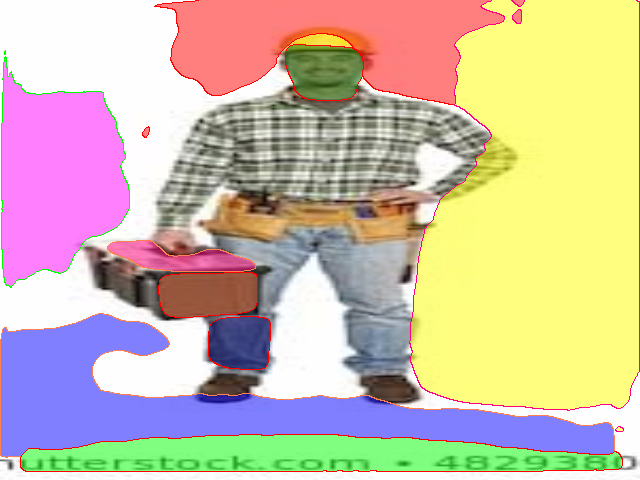

In [70]:
from IPython.display import Image, clear_output 
Image(filename='test/inference/996_segmentation_0_final.png', width=600)

In [2]:
#import os
#!os.chdir("/content/gdrive/My Drive/ColabFiles/S14/planercnn")
!ls /content/gdrive/'My Drive'/ColabFiles/S14/planercnn	     

ls: cannot access '/content/gdrive/My Drive/ColabFiles/S14/planercnn': No such file or directory


In [ ]:
#mkdir /content/gdrive/'My Drive'/ColabFiles/S14/Output/PlanerCnn_Output

In [4]:
!ls /content/gdrive/'My Drive'/ColabFiles/S14/Output/PlanerCnn_Output

In [7]:
!ls /content/gdrive/'My Drive'/ColabFiles/S14/planercnn/test/inference/*segmentation*final* |wc -l

3554


In [9]:
!cp /content/gdrive/'My Drive'/ColabFiles/S14/planercnn/test/inference/*segmentation*final* /content/gdrive/'My Drive'/ColabFiles/S14/Output/PlanerCnn_Output

In [10]:
!ls /content/gdrive/'My Drive'/ColabFiles/S14/Output/PlanerCnn_Output |wc -l

3554
